# **Insurance Fraud Analysis and Feature selection**

Submitted by: Group 9

Group Members
- FT252082 SAYAN DE
- FT251024 BHARATH R NAIR
- FT252014 ANUJ DANDEKAR
- FT253059 NIVEDITHA ANANTHAPADMANABAN
- FT253091 SPANDANA BAJPAI
- FT251050 PERVELA TEJOVISHAL
- FT251009 AKASH SINGHA
- FT251028 GAURAV NAGESH WALKE

## Goal:

The objective of this analysis is to examine the insurance claim dataset to identify key features that can help detect fraudulent claims. The analysis will cover attribute exploration, handling missing values and outliers, and understanding the interactions between features. Additionally, it will assess the influence of each feature on the target column (fraudulent claims) and rank the features based on their predictive suitability. Visualizations will be used to highlight key patterns, providing actionable insights for improving fraud detection in insurance claims.

In [165]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [166]:
# Versions:

print("Pandas version :" , pd.__version__)
print("Numpy version: ", np.__version__)
from sklearn import __version__
print("scikitlearn version :",__version__)
from platform import python_version
print("Python version: ",python_version())

Pandas version : 2.2.2
Numpy version:  1.26.4
scikitlearn version : 1.5.2
Python version:  3.10.12


In [167]:
df = pd.read_csv('/content/Final_group_Assignment_MotorInsuranceFraudClaimABTFull.csv')

In [168]:
# data overview
df.head()

,ID,Insurance Type,Income of Policy Holder,Marital Status,Num Claimants,Injury Type,Overnight Hospital Stay,Claim Amount,Total Claimed,Num Claims,Num Soft Tissue,% Soft Tissue,Claim Amount Received,Fraud Flag
0,1,CI,0,NaN,2,Soft Tissue,No,1625,3250,2,2.0,1.0,0,1
1,2,CI,0,NaN,2,Back,Yes,15028,60112,1,0.0,0.0,15028,0
2,3,CI,54613,Married,1,Broken Limb,No,-99999,0,0,0.0,0.0,572,0
3,4,CI,0,NaN,3,Serious,Yes,270200,0,0,0.0,0.0,270200,0
4,5,CI,0,NaN,4,Soft Tissue,No,8869,0,0,0.0,0.0,0,1


In [169]:
df.shape

(500, 14)

Depth Breadth analysis : we have 500 records with 14 attributes(13 features and 1 target), there is a good no of features to predict the target varible but we need to check the Quality of the data and relationship bewteen the features

## Checking Null values

In [170]:
df.isnull().sum()/len(df)*100

,0
ID,0.0
Insurance Type,0.0
Income of Policy Holder,0.0
Marital Status,66.0
Num Claimants,0.0
Injury Type,0.0
Overnight Hospital Stay,0.0
Claim Amount,0.0
Total Claimed,0.0
Num Claims,0.0


marital status has 66% values missing

In [171]:
data = df

In [172]:
data.columns

Index(['ID', 'Insurance Type ', 'Income of Policy Holder', 'Marital Status',
       'Num Claimants', 'Injury Type', 'Overnight Hospital Stay',
       'Claim Amount', 'Total Claimed', 'Num Claims', 'Num Soft Tissue',
       '% Soft Tissue', 'Claim Amount Received', 'Fraud Flag'],
      dtype='object')

In [173]:
data.drop('ID', axis = 1,inplace =  True)

Dropping the ID column as its insignificant for our analysis

In [174]:
print("Summary Statistics")
data.describe()

Summary Statistics


,Income of Policy Holder,Num Claimants,Claim Amount,Total Claimed,Num Claims,Num Soft Tissue,% Soft Tissue,Claim Amount Received,Fraud Flag
count,500.000000,500.000000,500.00000,500.00000,500.000000,490.000000,500.000000,500.000000,500.000000
mean,13739.994000,1.908000,16373.20400,9597.18600,0.798000,0.234694,0.172012,13051.942000,0.336000
std,20081.535489,1.012713,29426.27696,35655.68622,2.666724,0.589635,0.428015,30547.194864,0.472812
min,0.000000,1.000000,-99999.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,3322.25000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,5663.00000,0.00000,0.000000,0.000000,0.000000,3253.500000,0.000000
75%,33918.500000,3.000000,12245.50000,11282.75000,1.000000,0.000000,0.000000,8191.750000,1.000000
max,71284.000000,4.000000,270200.00000,729792.00000,56.000000,5.000000,2.000000,295303.000000,1.000000


## Observations

1. **Income Disparity**: A large portion of policyholders report zero income (median: 0), but the high maximum (71,284) and standard deviation indicate significant variability in income levels.

2. **Claims Behavior**: Most policyholders file 1-3 claims, but extreme outliers exist, with one policyholder filing up to 56 claims.

3. **Claim Amount Issues**: The `Claim Amount` column contains a suspicious negative value (-99,999), indicating potential data errors, alongside a wide range of claim values (from 0 to 270,200).

4. **Fraud Prevalence**: Approximately 34% of claims are flagged as fraudulent, highlighting a potential concern for the insurer.

## Data Preprocessing

In [175]:
# Handle Missing Values
missing_values = data.isnull().sum()
print("Missing Values")
print(missing_values[missing_values > 0])


Missing Values
Marital Status     330
Num Soft Tissue     10
dtype: int64


For the missing values ->
1. Marital Status = there is significant amount of missing values so we have replaced that with 'Unknown'
2. Num Soft Tissues has relatively less no of missing values so we replace them with median as its less impacted by outliers

In [176]:
# missing value treatment
data['Marital Status'].fillna('Unknown', inplace=True)
data['Num Soft Tissue'].fillna(data['Num Soft Tissue'].median(), inplace=True)

In [177]:
data.isnull().sum()

,0
Insurance Type,0
Income of Policy Holder,0
Marital Status,0
Num Claimants,0
Injury Type,0
Overnight Hospital Stay,0
Claim Amount,0
Total Claimed,0
Num Claims,0
Num Soft Tissue,0


## Fixing issues in Claim amount column

- There is a Claim amount of -99999, which is definately a Data entry error
- We are replacing it with the Median so that it does not distort the distribution

In [178]:
median_claim_amount = df.loc[df['Claim Amount'] != -99999, 'Claim Amount'].median()
df['Claim Amount'] = df['Claim Amount'].replace(-99999, median_claim_amount)

Fraud Flag Distribution

In [179]:
data['Fraud Flag'].value_counts(normalize = True)

,proportion
Fraud Flag,
0,0.664
1,0.336


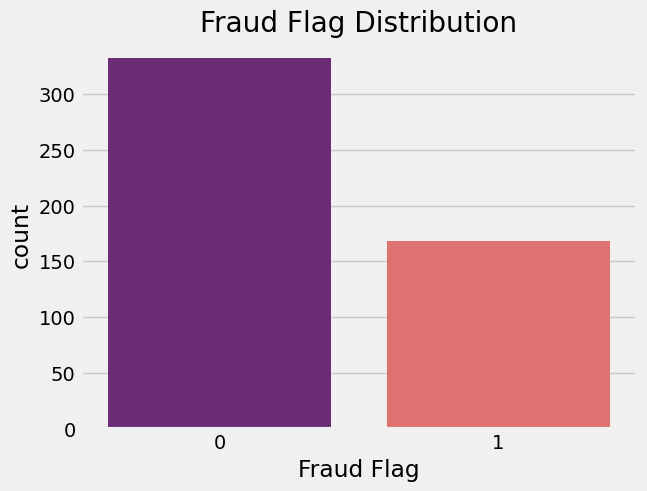

In [180]:
sns.countplot(x = 'Fraud Flag', data = df, palette = 'magma')
plt.title('Fraud Flag Distribution')
plt.show()


- There were 168 claims (33.6 percent) that were detected as fraudulent while 332 (66.4 percent) were regarded as non-fraudulent. The overwhelming majority of fraudulent claims are usually lodged in the lower range claim amounts.

In [181]:
df['Fraud Flag'].value_counts()

,count
Fraud Flag,
0,332
1,168


In [182]:
# list of continuous variables
cont = ['Income of Policy Holder','Claim Amount','Total Claimed','Claim Amount Received']

## Histogram to undersatnd the distribution of the Continuois variables

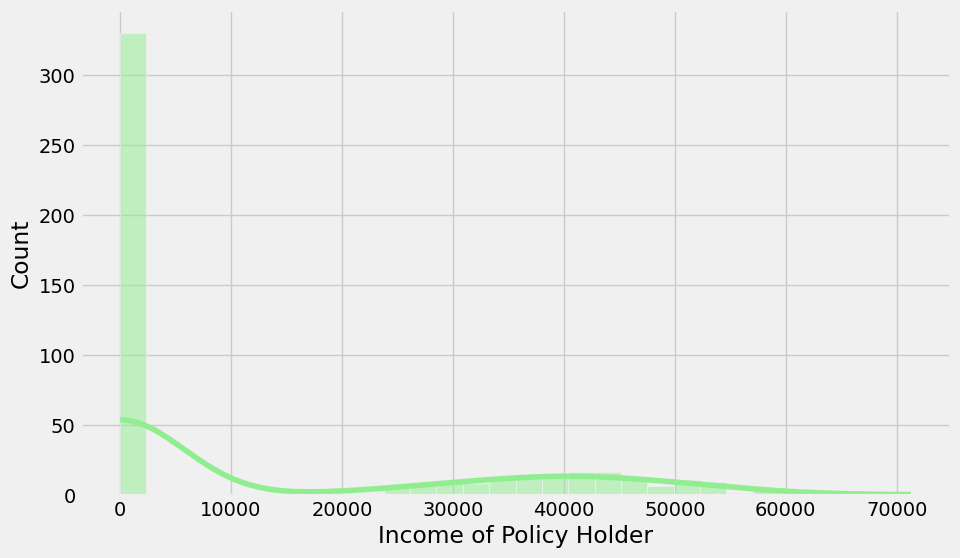

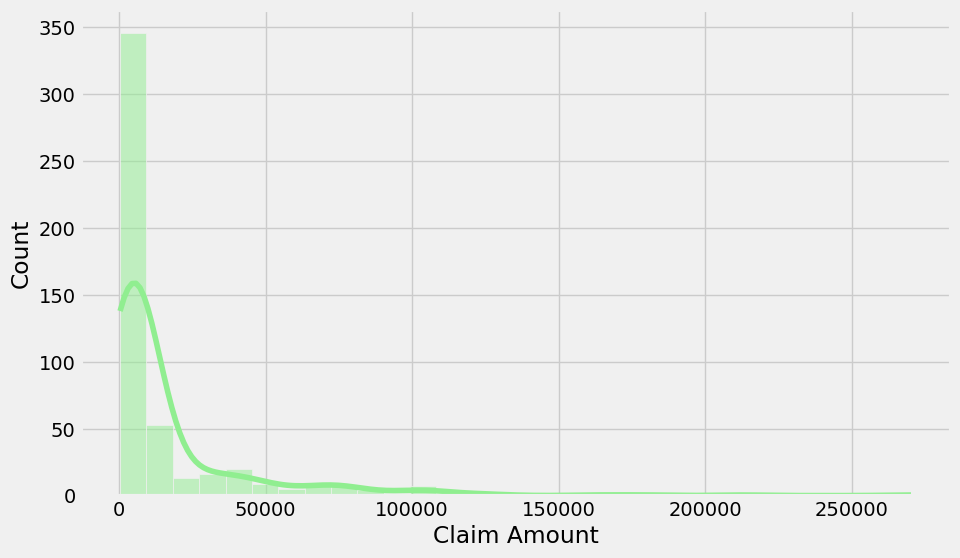

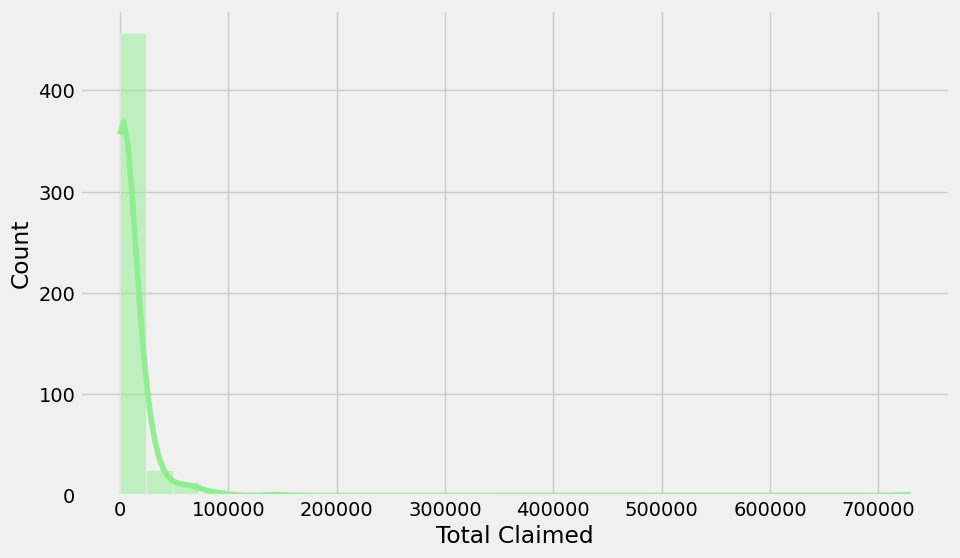

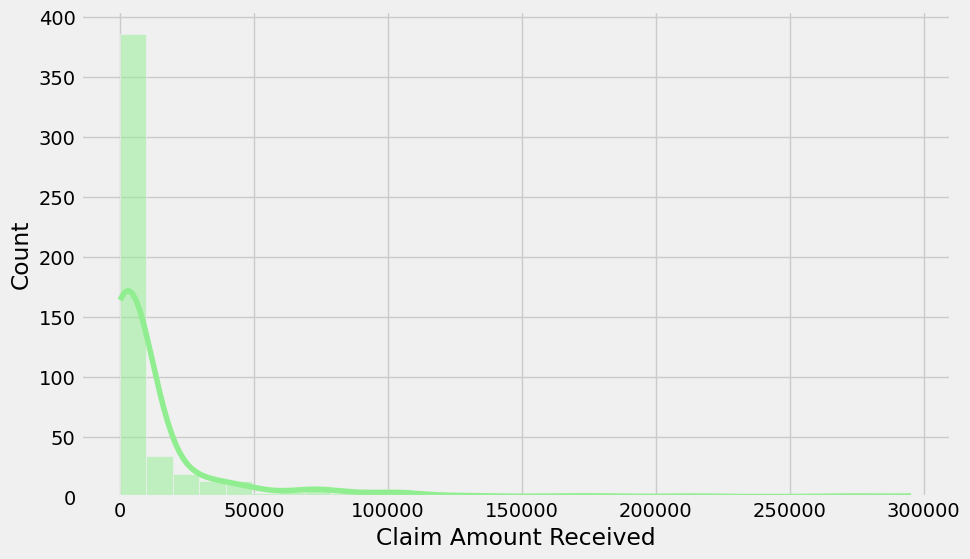

In [183]:
for col in cont:
  plt.figure(figsize = (10,6))
  sns.histplot(data[col], kde = True, bins = 30, color = 'lightgreen')
  plt.show()

## Insights

1. Claims are mainly in lesser amount range (mean = 16373.2 dollars) while a few significant high-value outliers (max = 270200 dollars). Roughly 50 percent of claims fall under 5663, which is the median indicating a skewed distribution.

2. There  is a high no of claims where the 'Claim amount received ' is 0

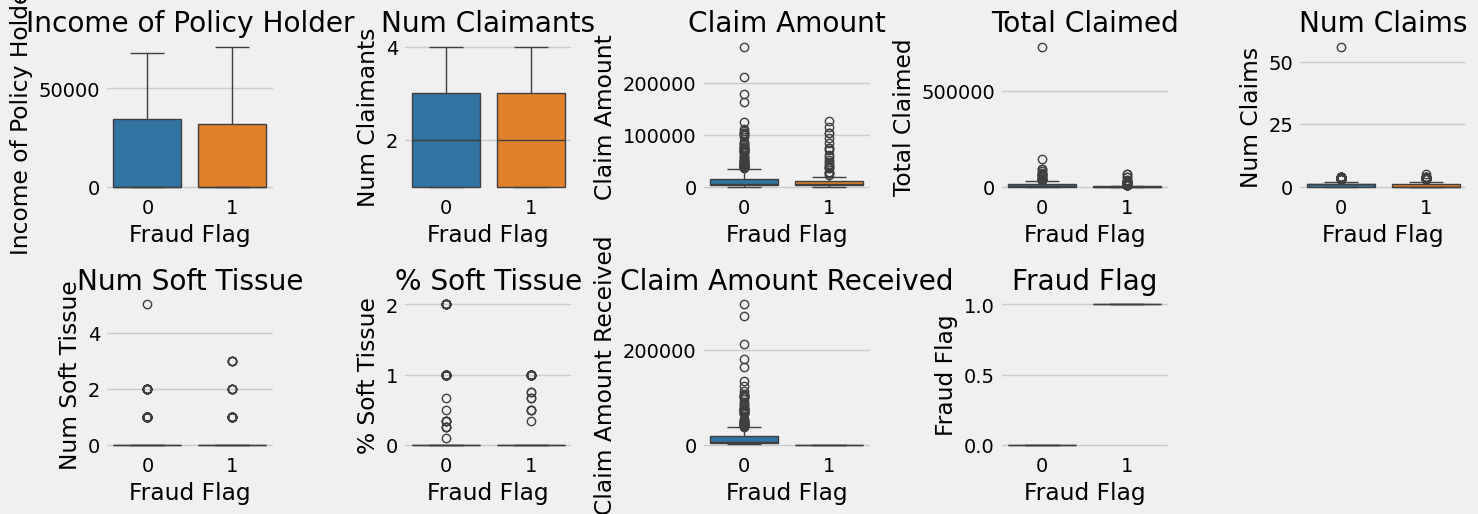

In [184]:
# Boxplots to visualize outliers
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(y = column,x = 'Fraud Flag', data = data, palette = 'tab10')
    plt.title(column)
plt.tight_layout()
plt.show()

## Observations

1. **Income Distribution**: Income ranges are similar for both fraudulent and non-fraudulent claims, with medians close to the center of the range.  
2. **Claim Amount**: Fraudulent claims show higher outliers, with the range extending significantly beyond non-fraudulent claims.  
3. **Total Claimed**: Non Fraudulent cases have a wider range compared to non-fraudulent ones.  
4. **Number of Claims**: Fraudulent claims have a higher outliers, suggesting inflated or repeated claims.
5. **No of Claimants** : This is also Identical for Fraudulent and Non fraudulent claims

## Outlier Treatment

In [185]:
# Outlier treatment using IQR
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

In [186]:
data.columns

Index(['Insurance Type ', 'Income of Policy Holder', 'Marital Status',
       'Num Claimants', 'Injury Type', 'Overnight Hospital Stay',
       'Claim Amount', 'Total Claimed', 'Num Claims', 'Num Soft Tissue',
       '% Soft Tissue', 'Claim Amount Received', 'Fraud Flag'],
      dtype='object')

In [187]:
data_new = data[['Insurance Type ', 'Income of Policy Holder', 'Marital Status',
       'Num Claimants', 'Injury Type', 'Overnight Hospital Stay',
       'Claim Amount', 'Total Claimed', 'Num Claims','Claim Amount Received', 'Fraud Flag']]

In [188]:
data_new.describe()

,Income of Policy Holder,Num Claimants,Claim Amount,Total Claimed,Num Claims,Claim Amount Received,Fraud Flag
count,500.000000,500.000000,500.000000,500.000000,500.0000,500.000000,500.000000
mean,13739.994000,1.908000,9438.776000,6546.879750,0.6070,6107.795000,0.336000
std,20081.535489,1.012713,8601.924386,9051.398068,0.7604,7292.071384,0.472812
min,0.000000,1.000000,385.000000,0.000000,0.0000,0.000000,0.000000
25%,0.000000,1.000000,3354.000000,0.000000,0.0000,0.000000,0.000000
50%,0.000000,2.000000,5668.000000,0.000000,0.0000,3253.500000,0.000000
75%,33918.500000,3.000000,12245.500000,11282.750000,1.0000,8191.750000,1.000000
max,71284.000000,4.000000,25582.750000,28206.875000,2.5000,20479.375000,1.000000


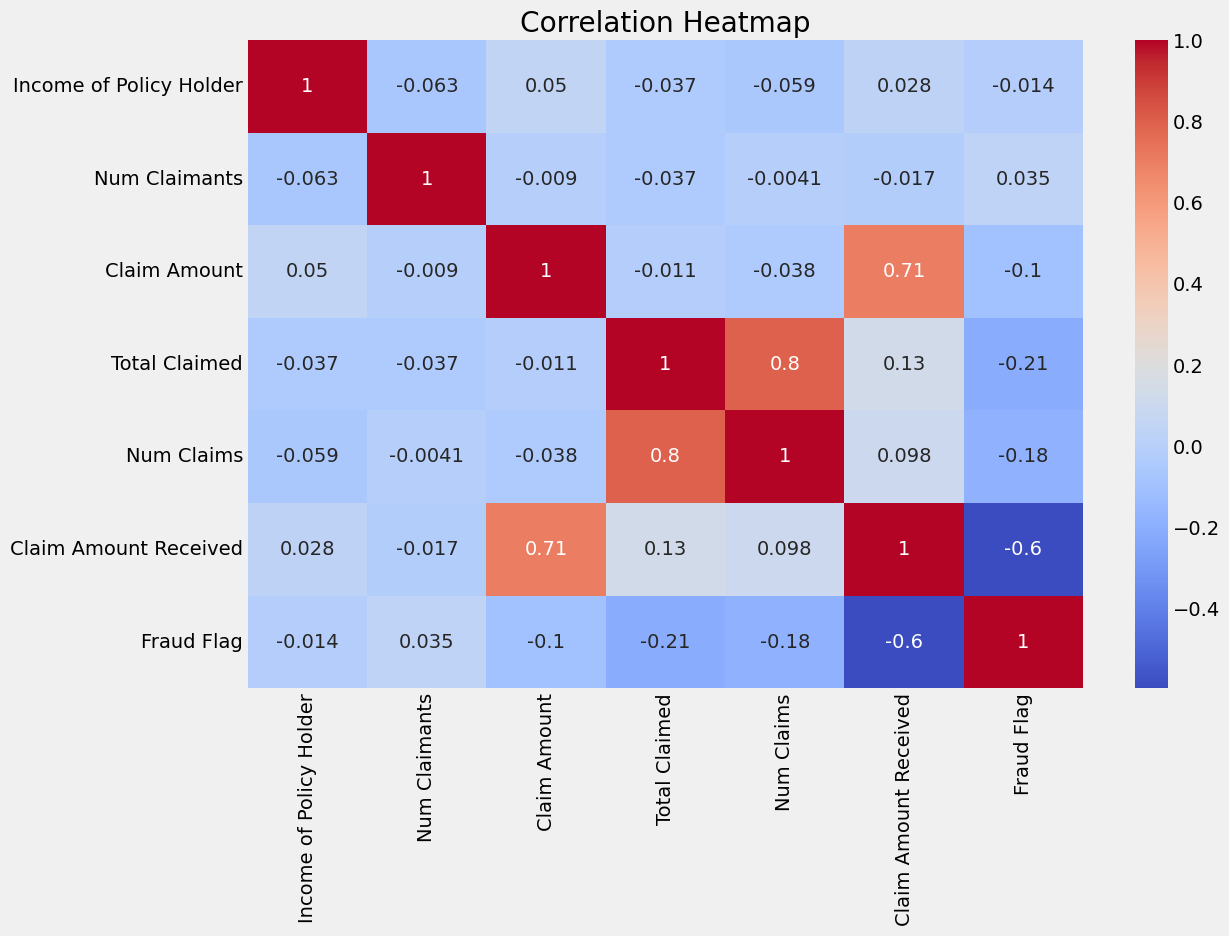

In [189]:
# Heatmap of correlations
plt.figure(figsize=(12, 8))
correlation_matrix = data_new.corr(numeric_only = True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Observations:

1. **Claim Amount vs. Claim Amount Received (0.71)**: A strong positive correlation indicates that as the claim amount increases, the amount received also tends to increase proportionally.  

2. **Total Claimed vs. Number of Claims (0.8)**: High correlation suggests that the total claimed value is significantly influenced by the number of claims filed, highlighting a potential link between multiple claims and inflated claim totals.  

3. **Fraud Flag vs. Claim Amount Received (-0.6)**: A strong negative correlation reveals that fraudulent claims are associated with lower amounts received, possibly due to increased scrutiny or adjustments.  

4. **Fraud Flag vs. Total Claimed (-0.21)**: The negative correlation suggests that fraudulent cases may involve higher claimed totals, but these totals often don't translate to higher received amounts.  

5. **Income of Policy Holder (weak correlations)**: Minimal correlation with other variables implies that income doesn't significantly impact claim patterns, fraud likelihood, or received amounts.  

6. **Fraud Flag vs. Number of Claims (-0.18)**: The weak negative correlation indicates that fraudulent cases may involve slightly more frequent claims but not a strong pattern.  

In [190]:
# Check for features with high correlation to the target
target_column = 'Fraud Flag'  # Assuming this is the target
correlation_with_target = correlation_matrix[target_column].sort_values(ascending=False)
print("Features Highly Correlated with Target")
print(correlation_with_target)

Features Highly Correlated with Target
Fraud Flag                 1.000000
Num Claimants              0.035391
Income of Policy Holder   -0.013792
Claim Amount              -0.101200
Num Claims                -0.181022
Total Claimed             -0.214826
Claim Amount Received     -0.596422
Name: Fraud Flag, dtype: float64


- So, only 'Claim Amount received' has high (-0.6) negative correlation with the Target
- It indicates that the more likely a claim to be flagged as fraud , the lesser the amount received for the claim

In [191]:
df_cat = data.select_dtypes(include=['object', 'category']).columns

In [192]:
for col in df_cat:
    print(df[col].value_counts())


Insurance Type 
CI    500
Name: count, dtype: int64
Marital Status
Unknown     330
Married      99
Single       48
Divorced     23
Name: count, dtype: int64
Injury Type
Broken Limb    177
Soft Tissue    172
Back           116
Serious         35
Name: count, dtype: int64
Overnight Hospital Stay
No     354
Yes    146
Name: count, dtype: int64


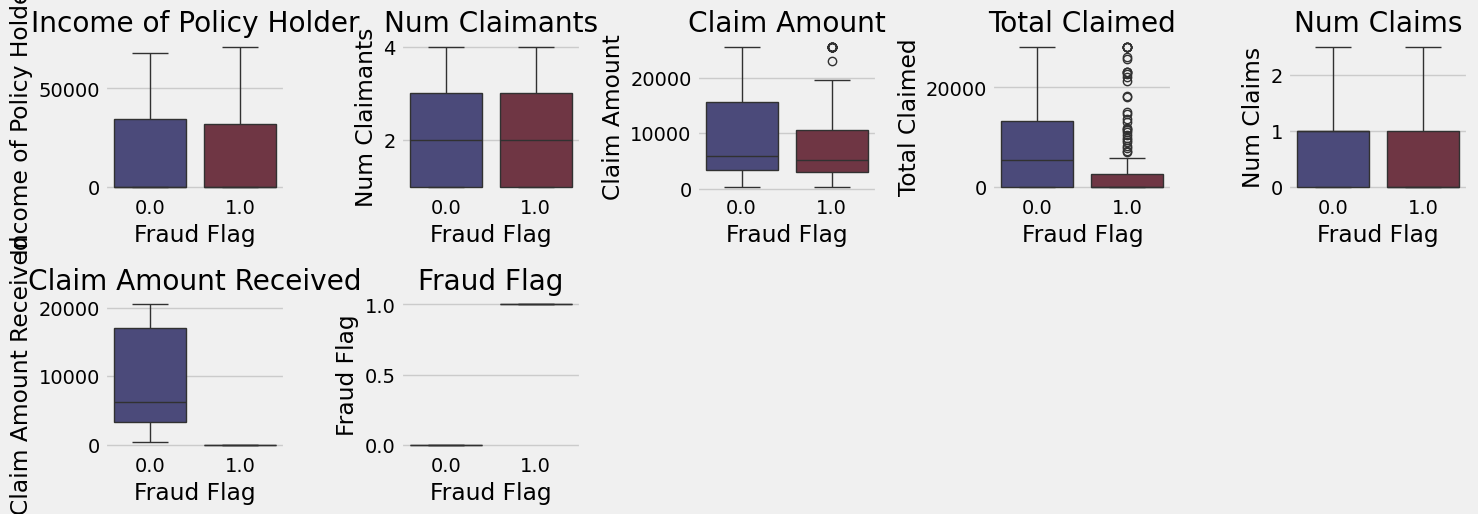

In [193]:
# Boxplots after Outlier treatment
numerical_columns = data_new.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(y = column,x = 'Fraud Flag', data = data_new, palette = 'icefire')
    plt.title(column)
plt.tight_layout()
plt.show()

## Observations

1. As we observe the spread is larger for Claim amount for Non fraudulent claims and the median is slightly lower for fraudulent claims
2. Total claimed median is significantly lower compared to Non fraudulent claims
3. For Fraudulent claims almost all the claims recived 0 amount

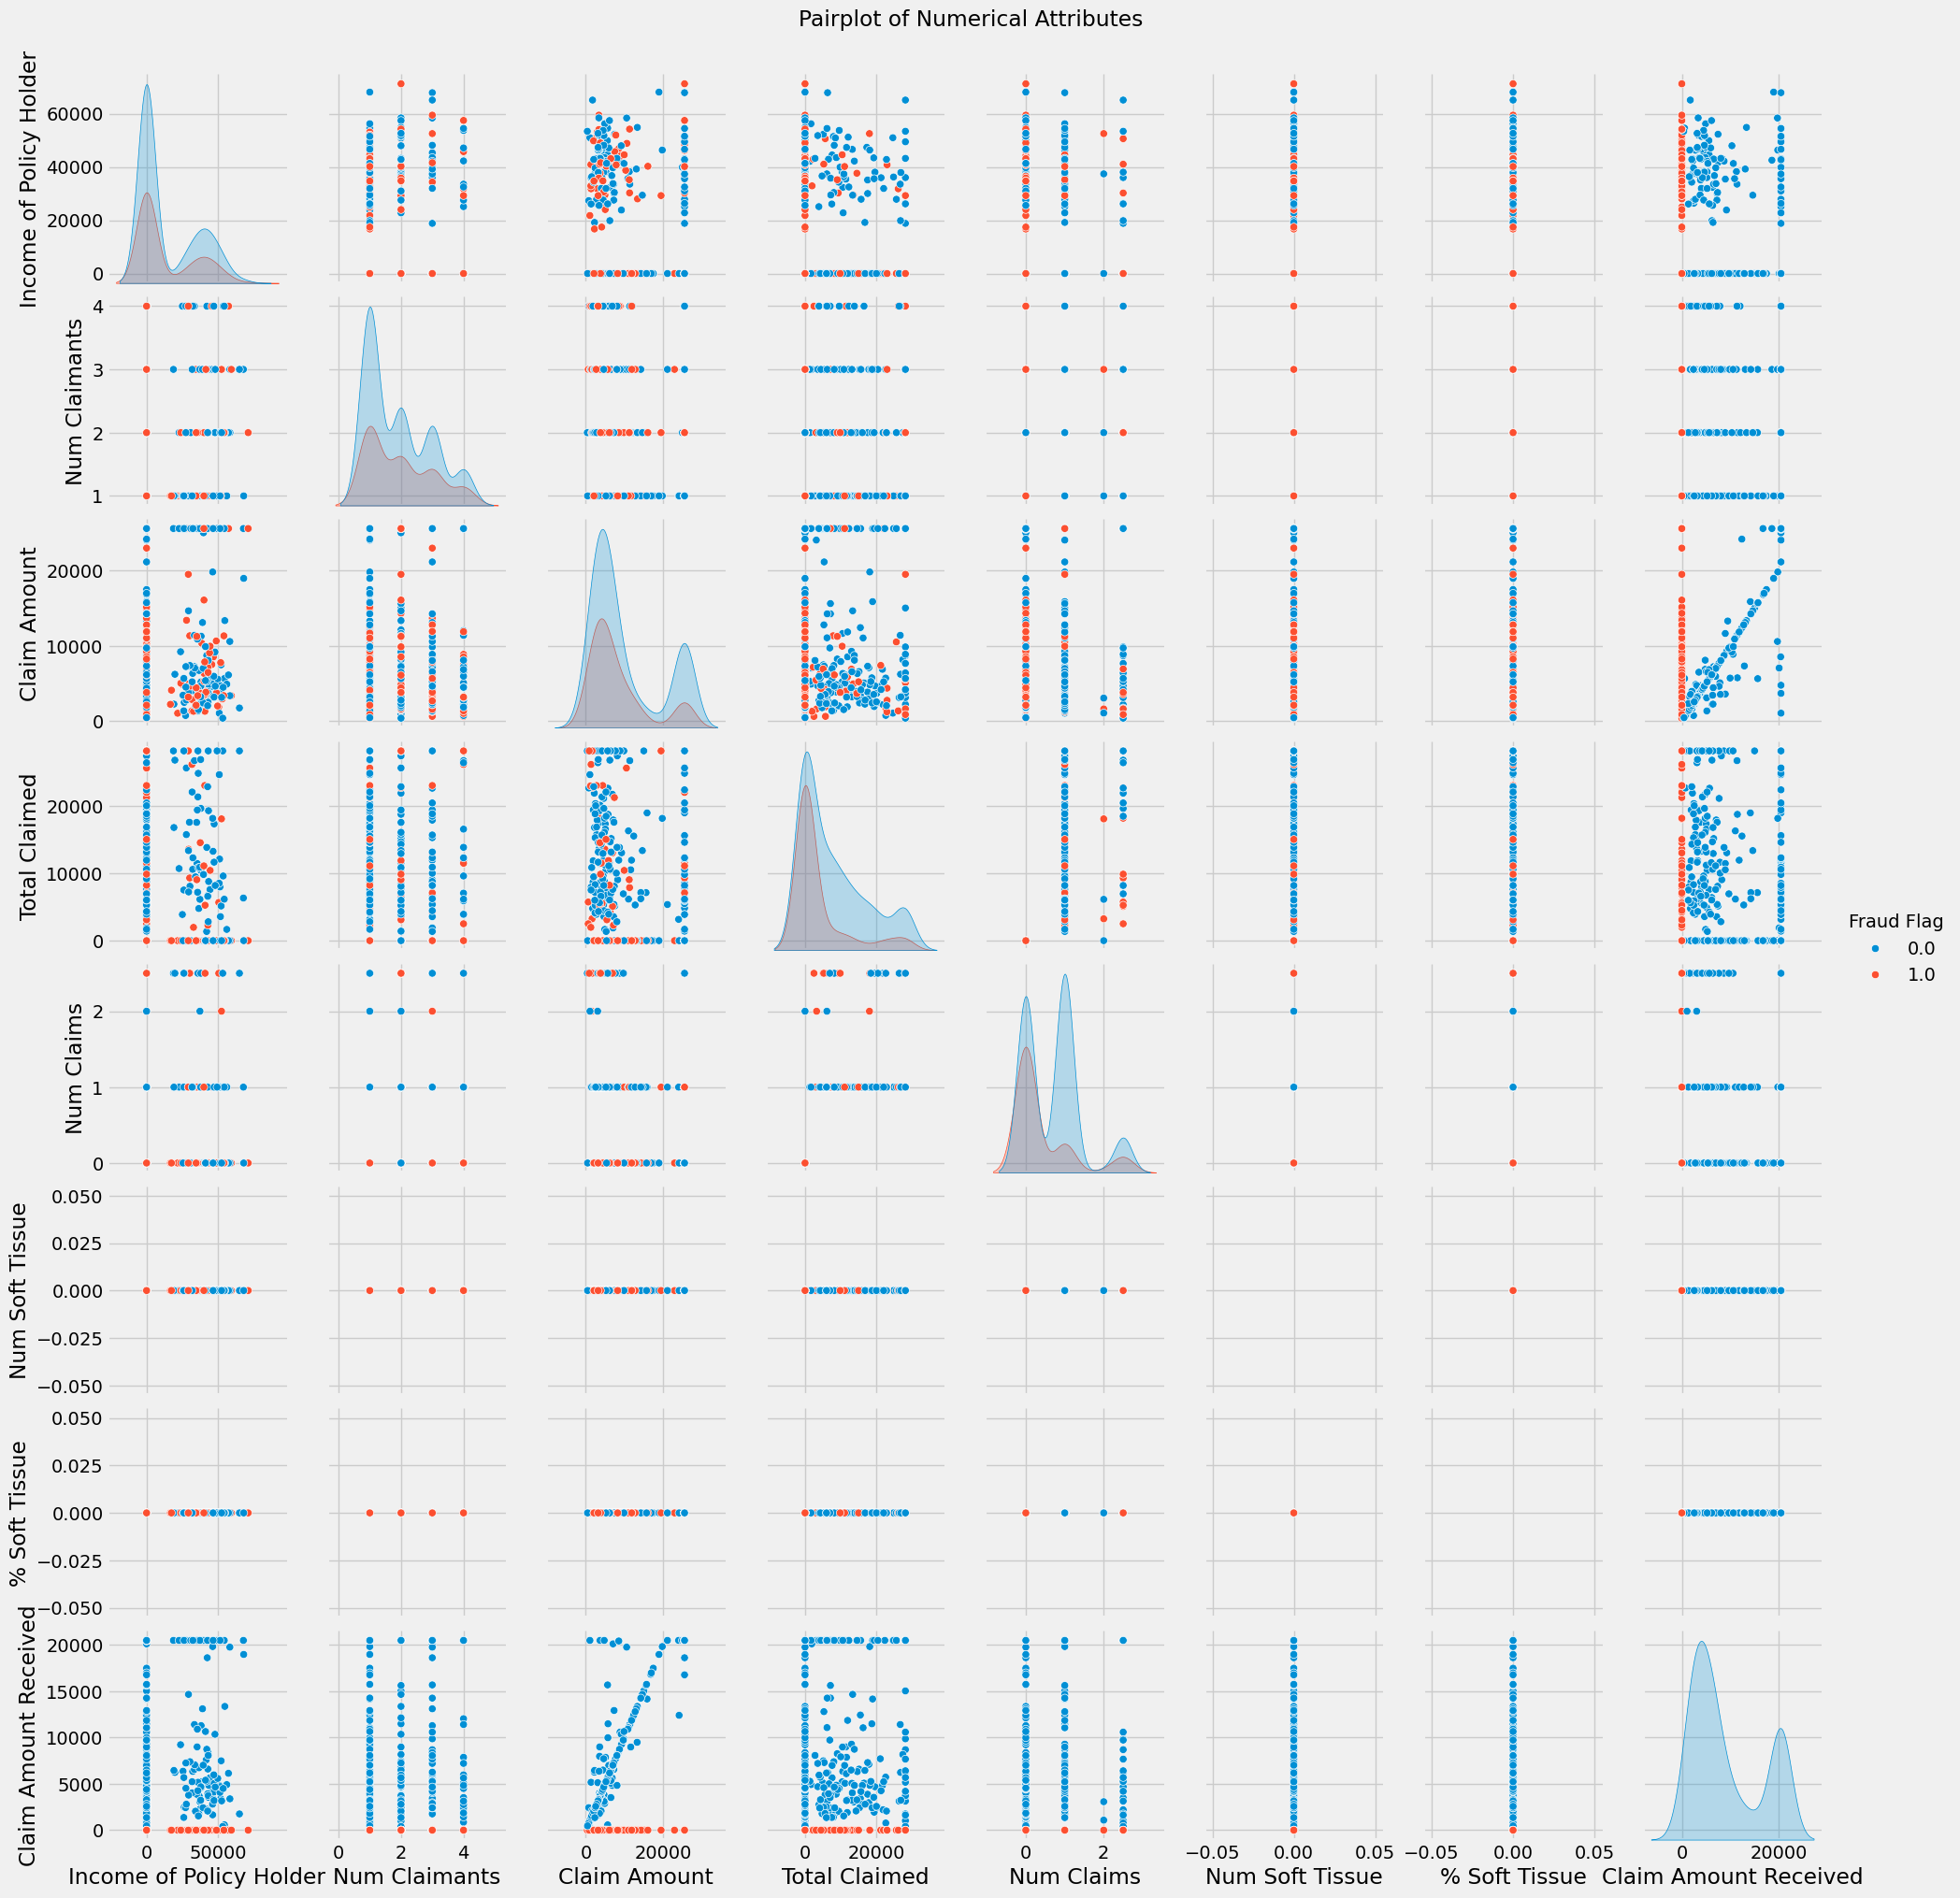

In [194]:
sns.pairplot(data, hue=target_column)
plt.suptitle('Pairplot of Numerical Attributes', y=1.02)
plt.show()

## Pairplot Observations:

1. Diagonal Analysis -

Income of Policy holder, Claim amount, total claim for all these attricbutes from their kde plot we can observe significant overalp between the 2 classes which indicates that these are not very good features for segregating the
classes

Claim AMount recieved has 2 distinct peaks  one at 0 which is for those fraudulent claims which does not received any claim amount and at 20000 which is the mean for those legit claims.

2. Off Diagonal Analysis-

Claim amount and Claim amount received shows a strong postive almost linear relation

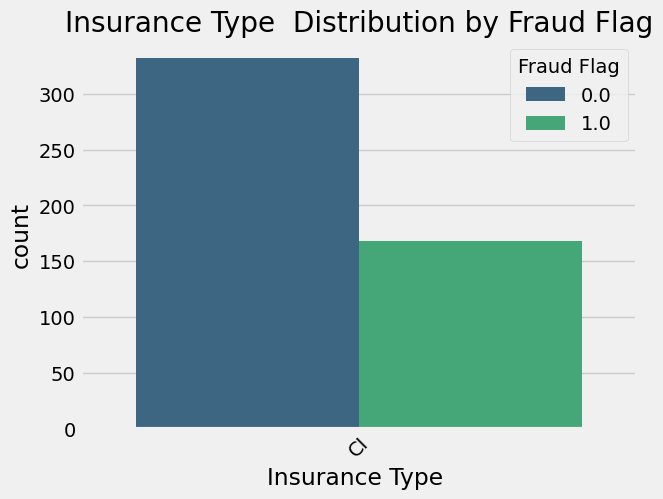

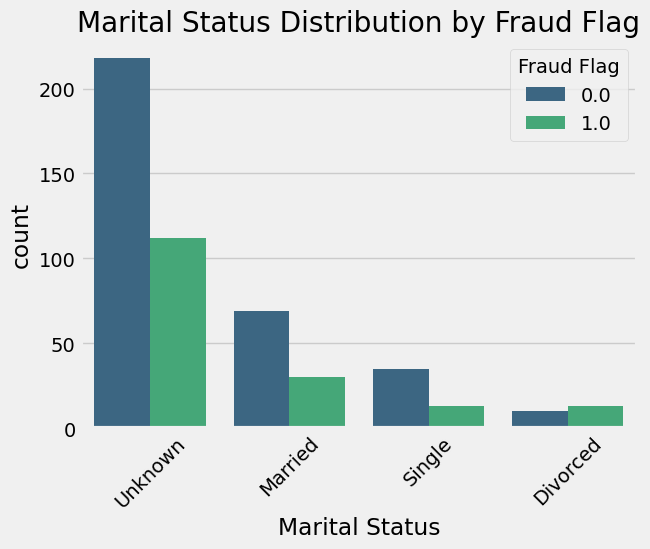

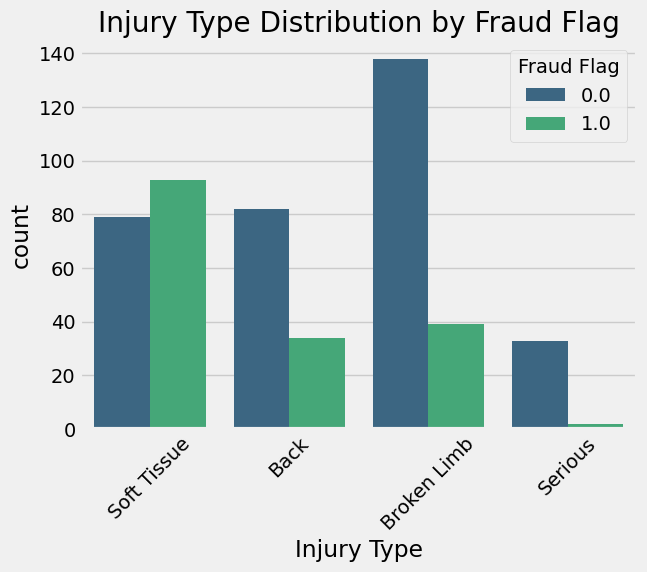

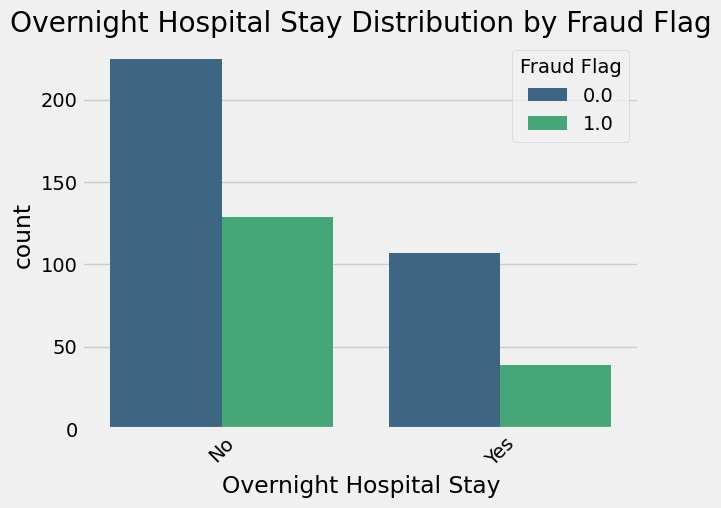

In [195]:
# Categorical attributes analysis
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    sns.countplot(x=col, hue=target_column, data=data, palette = 'viridis')
    plt.title(f'{col} Distribution by {target_column}')
    plt.xticks(rotation=45)
    plt.show()



## Observations:

1. Type of injury:  "broken limb"  is the most common injury type(177 cases, or 35.4 percent) followed by "Soft tissue" with 172 cases (34.4 percent), followed by; the "serious" case is very rare (35 cases, or 7 percent). Fraud rates differ for these types. "Soft tissue" injuries have a more pronounced association with fraudulent claims.

2. Overnight hospital Stay: Majority of the cases does not require a Overnight Hospital stay

3. Marital Status: 330 policyholders (66 percent) were marked as "unknown," followed by "married" (99 cases, 19.8 percent), "single" (48 cases, 9.6 percent), and divorced (23 cases, 4.6 percent).


## Analysing Feature Importance

In [105]:
# SFeature Importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare data for modeling
X = data.drop(columns=[target_column])
X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical variables
y = data[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
# Fit a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Feature Importance
                        Feature  Importance
7         Claim Amount Received    0.770437
2                  Claim Amount    0.047174
13      Injury Type_Soft Tissue    0.044150
3                 Total Claimed    0.040203
4                    Num Claims    0.026131
0       Income of Policy Holder    0.018929
1                 Num Claimants    0.014779
11      Injury Type_Broken Limb    0.012316
12          Injury Type_Serious    0.007249
14  Overnight Hospital Stay_Yes    0.006130


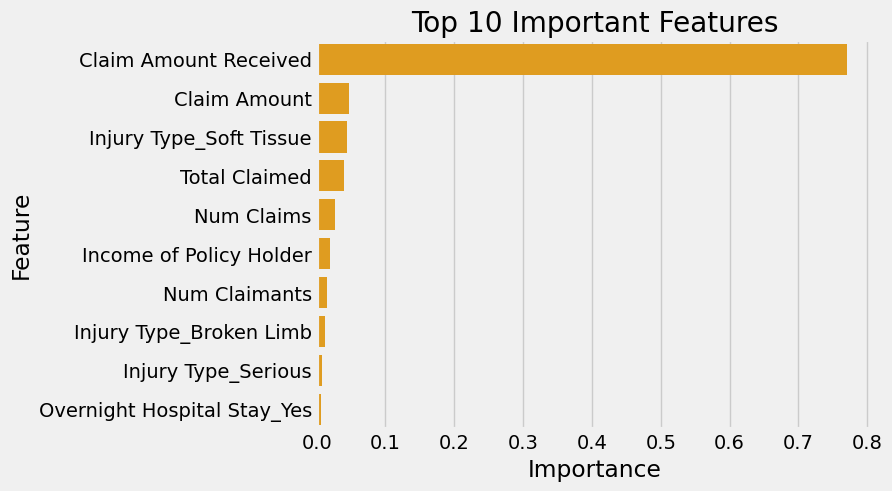

In [196]:
# Feature importance
importances = rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance")
print(feature_importance_df.head(10))

#Visualization of Feature Importance
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), color = 'orange')
plt.title('Top 10 Important Features')
plt.show()

- From the Feature Importance table we observe thatr 'Claim Amount recieved'  carries the highest feature importance

# **Selected Features**
1.	Claim Amount: Directly reflects claim size, an important indicator of fraud likelihood. For example, lower claim amounts often correlate with fraud (feature importance = 0.0472).
2.	Injury Type: Strong correlation with fraud behavior. "Soft Tissue" claims have the highest association with fraud (importance = 0.0442).
3.	Num Claims: Reflects the frequency of claims, which can highlight suspicious patterns. Policies with unusually high numbers of claims (e.g., 56) may indicate fraud (importance = 0.0261).
4.	Income of Policy Holder: Provides contextual information about claimants, particularly for unusual claim amounts. Policyholders with zero income have higher fraud rates (importance = 0.0189).
5.	Num Claimants: Indicates the complexity of claims, which might correlate with fraud. Fraudulent claims are slightly more frequent in policies with multiple claimants (importance = 0.0148).
6.	Overnight Hospital Stay: Adds information about injury severity, potentially influencing fraud likelihood. Claims with no hospital stays are more likely to be fraudulent (importance = 0.0061).


## **Excluded Features**

1.	Claim Amount Received: Dropped due to data leakage as it reflects post-claim outcomes. Its feature importance was 0.7704, confirming its strong but inappropriate influence.

- Justification:
In this case, "Claim Amount Received" reflects post-claim outcomes—information that is only available after a claim has been processed, making it unavailable at the time of prediction so this variable should not be considered as a Predictor.

- Including this feature would mean the model is leveraging information that would not be available during real-world predictions, leading to artificially
inflated performance during training but poor generalization in practice.
2.	ID: Dropped as it is a unique identifier with no predictive value.
3.	Insurance Type: Dropped as all claims belong to the same category ("CI"), offering no variability.
4.	Total Claimed: Dropped due to its high correlation with Num Claims (correlation = 0.799), leading to redundancy in information.


## **Observations**
1. Claims with low amounts and "Soft Tissue" injuries (34.4%) are more likely to be fraudulent.
2. High Claim Amount Received correlates negatively with fraud (-0.596), likely due to claim denials or reduced payouts for fraudulent claims.
3. Missing data for Marital Status and Num Soft Tissue were handled appropriately to avoid bias in the analysis.
4. Extreme outliers in Claim Amount (e.g., -99,999) were addressed to improve model accuracy.
5. Correlation analysis shows strong predictive potential for Claim Amount (0.705) and Injury Type.
6. Total Claimed and Num Claims are closely related (0.799), offering redundancy in fraud detection insights.
7. Overnight hospital stays, though less frequent (29.2%), may indicate more legitimate claims due to higher injury severity.

## **Conclusion**
The analysis identifies key attributes like Claim Amount, Injury Type, and Num Claims as effective predictors of fraud detection. Removing Claim Amount Received ensures no data leakage in the model.
